In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [3]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

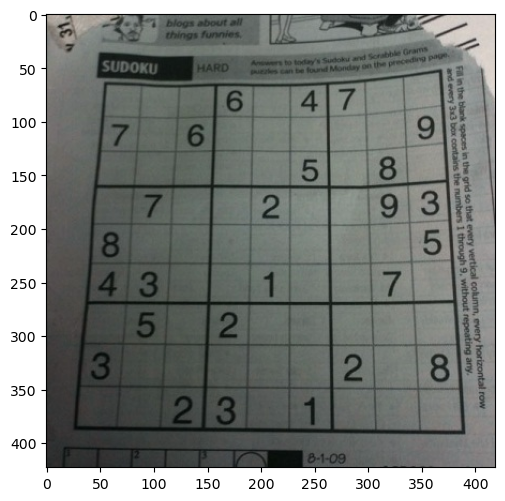

In [4]:
img = cv2.imread('img/b.jpg', -1)
show_img_plt(img)

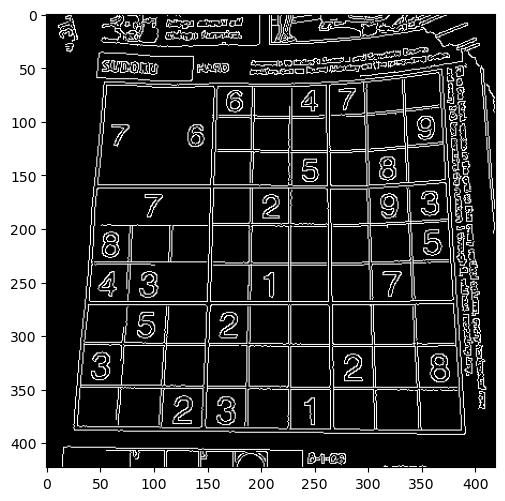

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_img, 50, 150, 3)
show_img_plt(edges)

In [6]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
print(lines)

[[[ 2.7100000e+02  1.5707964e+00]]

 [[ 2.6800000e+02  1.5707964e+00]]

 [[ 2.2600000e+02  0.0000000e+00]]

 [[ 1.9500000e+02  1.7453292e-02]]

 [[ 1.6200000e+02  3.4906585e-02]]

 [[ 1.5900000e+02  3.4906585e-02]]

 [[-2.6200000e+02  3.1241393e+00]]

 [[-2.9300000e+02  3.1066861e+00]]

 [[ 1.9300000e+02  1.7453292e-02]]

 [[ 2.2800000e+02  0.0000000e+00]]

 [[ 1.6200000e+02  1.5707964e+00]]

 [[ 6.2000000e+01  8.7266460e-02]]

 [[-2.9500000e+02  3.1066861e+00]]

 [[ 5.9000000e+01  8.7266460e-02]]

 [[-2.5900000e+02  3.1241393e+00]]

 [[ 1.5900000e+02  1.5707964e+00]]

 [[ 3.4800000e+02  1.5707964e+00]]

 [[-3.7800000e+02  3.0717795e+00]]

 [[-3.2700000e+02  3.0892327e+00]]

 [[ 6.4000000e+01  1.0471976e-01]]

 [[ 2.3100000e+02  1.5707964e+00]]

 [[-3.2900000e+02  3.0892327e+00]]

 [[ 1.9700000e+02  1.5707964e+00]]

 [[ 4.0300000e+02  1.5882496e+00]]

 [[ 1.6400000e+02  5.2359879e-02]]

 [[-3.8300000e+02  3.0717795e+00]]

 [[-3.7300000e+02  3.0717795e+00]]

 [[ 3.0700000e+02  1.5707964

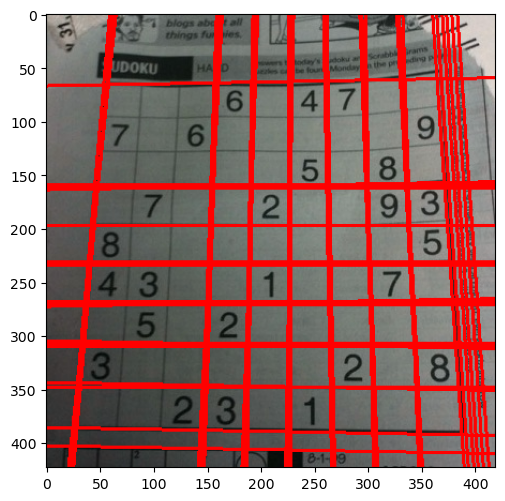

In [7]:
for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = rho * a
    y0 = rho * b
    
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000 * (a))
    
    x2 = int(x0 - 1000 *(-b))
    y2 = int(y0 - 1000 * a)
    
    
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    
show_img_plt(img)
    
    
    
    
    

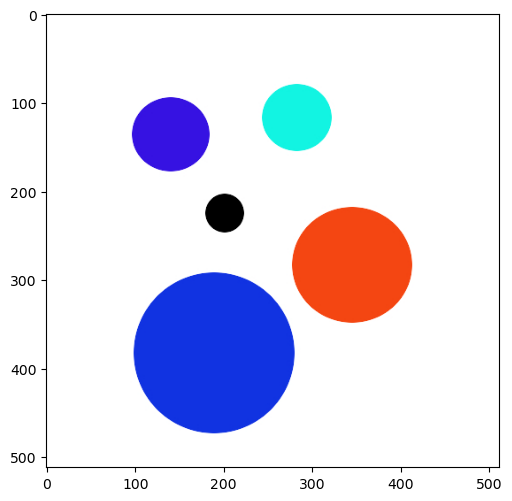

In [8]:
#Hough Circles
circle_img = cv2.imread('img/c.jpg', -1)
show_img_plt(circle_img)

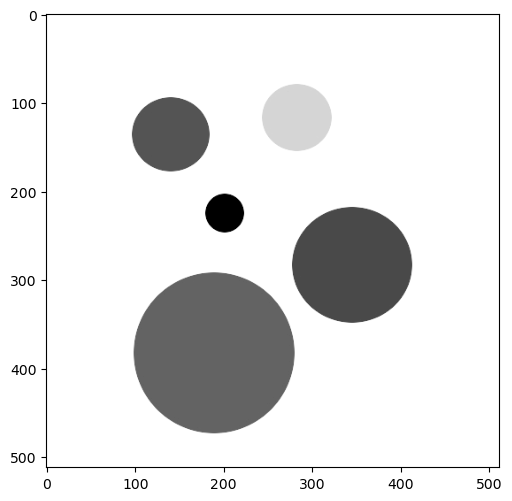

In [9]:
gray_circle_img = cv2.cvtColor(circle_img, cv2.COLOR_BGR2GRAY)
show_img_plt(gray_circle_img)

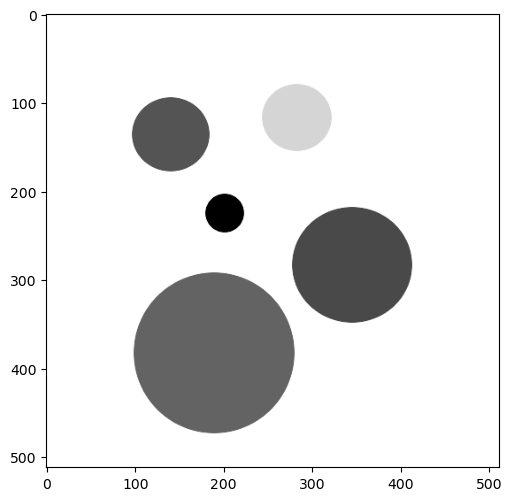

In [10]:
denoised_gray_circle_img = cv2.medianBlur(gray_circle_img, 5)
show_img_plt(denoised_gray_circle_img)

In [11]:
circles = cv2.HoughCircles(denoised_gray_circle_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0,maxRadius=0)
print(circles)

[[[189.5 383.5  90.7]
  [345.5 281.5  67. ]
  [282.5 116.5  38.6]
  [201.5 224.5  21.8]
  [139.5 135.5  42.4]
  [175.5 368.5  71.5]]]


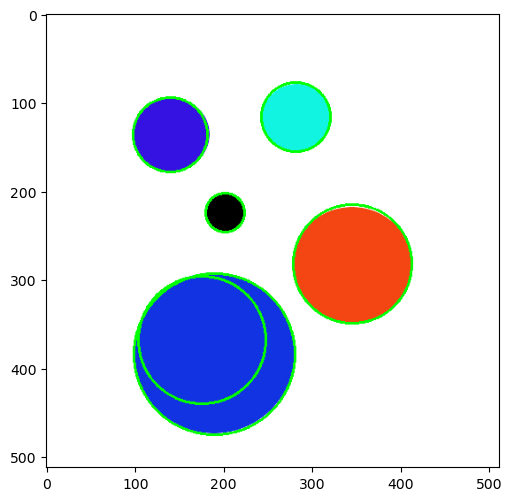

In [12]:
circles = np.round(circles[0, :]).astype('int')


for (x, y, r) in circles:
    cv2.circle(circle_img, (x, y), r, (0, 255, 0), 2)

show_img_plt(circle_img)

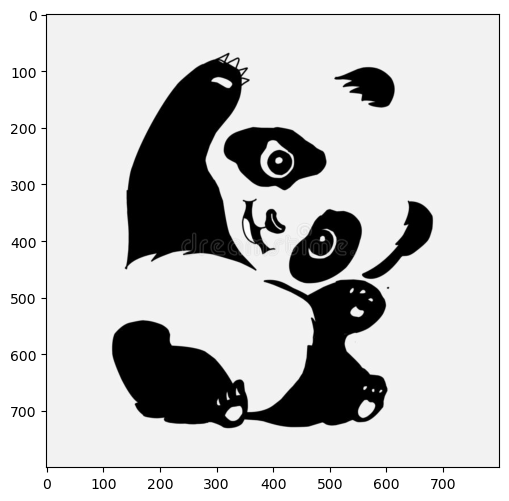

In [13]:
#Contours
img = cv2.imread('img/binary.jpg', 0)
show_img_plt(img)

In [17]:
ret, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
print(hierarchy)

(array([[[  2,   2]],

       [[  2, 797]],

       [[797, 797]],

       [[797,   2]]], dtype=int32), array([[[603, 480]],

       [[605, 480]],

       [[607, 482]],

       [[607, 484]],

       [[605, 486]],

       [[603, 486]],

       [[601, 484]],

       [[601, 482]]], dtype=int32), array([[[390, 468]],

       [[391, 467]],

       [[398, 467]],

       ...,

       [[383, 473]],

       [[383, 470]],

       [[385, 468]]], dtype=int32), array([[[336, 693]],

       [[334, 695]],

       [[329, 695]],

       [[328, 696]],

       [[326, 696]],

       [[326, 697]],

       [[319, 704]],

       [[319, 705]],

       [[318, 706]],

       [[318, 709]],

       [[325, 716]],

       [[329, 716]],

       [[330, 717]],

       [[331, 716]],

       [[334, 716]],

       [[335, 715]],

       [[336, 715]],

       [[340, 711]],

       [[340, 710]],

       [[343, 707]],

       [[343, 706]],

       [[344, 705]],

       [[344, 704]],

       [[345, 703]],

       [[345, 699]],

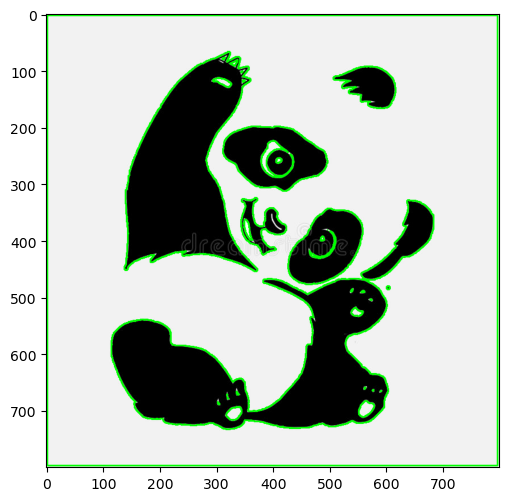

In [18]:
img2 = cv2.imread('img/binary.jpg', 1)
img3 = cv2.drawContours(img2, contours, -1, (0, 255, 0), 2)
show_img_plt(img3)

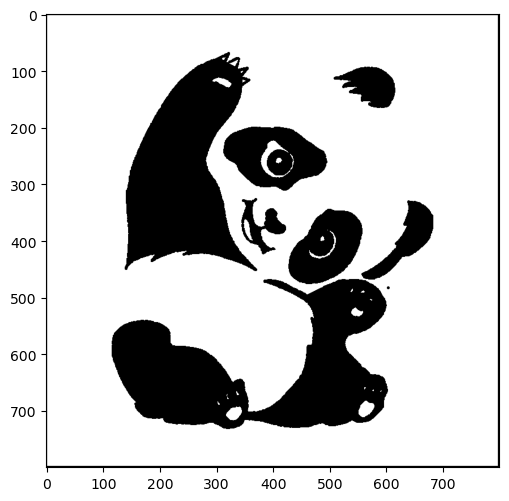

In [19]:
show_img_plt(thresh)